# income_credit_limit_ratio
- This ratio can be interpreted as an indicator of how comfortably a customer can handle the credit given their income. 
- Additionally, fraudulent applications might exhibit unusual patterns in this ratio. 
    - A very low ratio suggests that the customer has exceptionally low income relative to the credit limit, which might indicate an unusually high credit limit granted without proper check.
    - Conversely, a very high ratio indicates that the customer's income is exceptionally large relative to the customer's credit limit, which could suggest falsified income declarations.
    
Hypothesis 1: Low Ratio Indicates Potential Fraud
- H0: There is no significant difference in the rate of fraudulent cases between the group with low income_credit_limit_ratio (defined as 10% of the range above the min value) and the general population.
- H1: Applicants with low income to credit limit ratio tend to have higher fraud rates

Hypothesis 2: High Ratio Indicates Potential Fraud
- H0: There is no significant difference in the rate of fraudulent cases between the group with high income_credit_limit_ratio (defined as 10% of the range below the max value) and the general population.
- H1: Applicants with high income to credit limit ratio tend to have higher fraud rates

In [2]:
import pandas as pd
import numpy as np


In [3]:
x_train =  pd.read_csv('../data/processed/X_train.csv')
y_train = pd.read_csv('../data/processed/y_train.csv')
df = pd.concat([x_train, y_train], axis=1)

In [4]:
df['income_credit_limit_ratio'] = df['income'] / df['proposed_credit_limit']

Text(0, 0.5, 'Frequency')

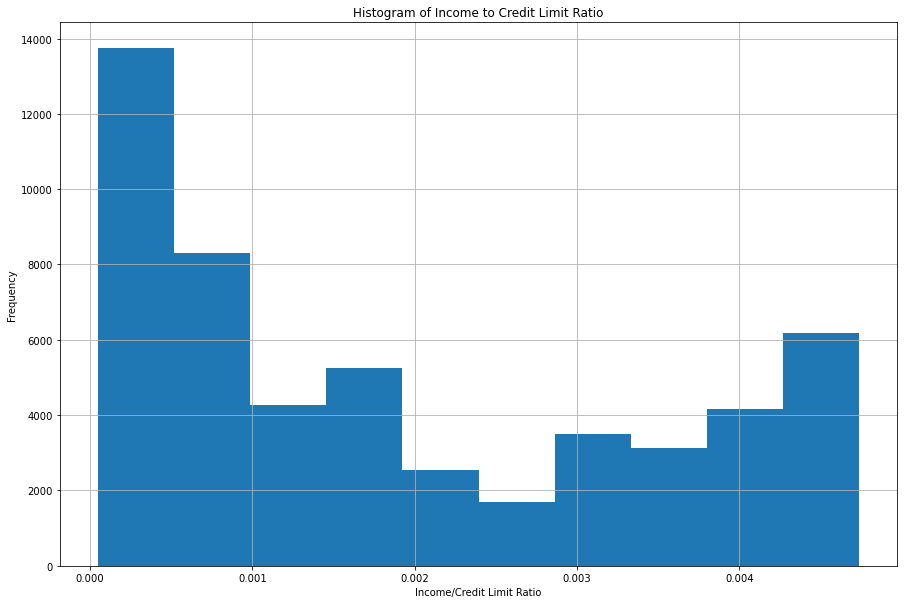

In [72]:
ax = df['income_credit_limit_ratio'].hist(figsize=[15, 10])
ax.set_title('Histogram of Income to Credit Limit Ratio')
ax.set_xlabel('Income/Credit Limit Ratio')
ax.set_ylabel('Frequency')

In [8]:
df['income_credit_limit_ratio'].describe()

count    52776.000000
mean         0.001883
std          0.001516
min          0.000050
25%          0.000500
50%          0.001500
75%          0.003500
max          0.004737
Name: income_credit_limit_ratio, dtype: float64

# 10% of the range below the max value & above min value to determine 'high' & 'low' levels of income_credit_limit_ratio

In [73]:
low_threshold = (df['income_credit_limit_ratio'].max() - df['income_credit_limit_ratio'].min())*0.1 + df['income_credit_limit_ratio'].min()
high_threshold = df['income_credit_limit_ratio'].max() - (df['income_credit_limit_ratio'].max() - df['income_credit_limit_ratio'].min())*0.1
print(low_threshold, high_threshold)

0.0005186842105263158 0.004268157894736843


In [74]:
distribution = df.groupby(['income_credit_limit_ratio', 'fraud_bool']).size().unstack(fill_value=0)
distribution_percentage = distribution.div(distribution.sum(axis=1), axis=0) * 100
distribution_percentage.reset_index(drop=False, inplace=True)
distribution_percentage.head()

fraud_bool,income_credit_limit_ratio,0,1
0,0.000050,48.214286,51.785714
1,0.000053,40.000000,60.000000
2,0.000067,82.034632,17.965368
3,0.000100,87.564767,12.435233
4,0.000101,88.235294,11.764706


In [75]:
import numpy as np
import scipy.stats as stats
from numpy.random import randn
 
stats.shapiro(distribution_percentage[0])

ShapiroResult(statistic=0.7650668621063232, pvalue=1.51136506088001e-10)

As p-value<0.05, we have sufficient evidence to reject the null hypothesis to say that sample does not come from a normal distribution.

As distribution of the proportion of fraud cases across values of income_credit_limit_ratio cannot be assumed as normal, will use Mann-Whitney U test for hypothesis testing

# Mann-Whitney U test

In [82]:
low_ratio = distribution_percentage[distribution_percentage['income_credit_limit_ratio'] <= low_threshold][1]
general_ratio = distribution_percentage[(distribution_percentage['income_credit_limit_ratio'] > low_threshold) &\
                                       (distribution_percentage['income_credit_limit_ratio'] < high_threshold)][1] 
high_ratio = distribution_percentage[distribution_percentage['income_credit_limit_ratio'] >= high_threshold][1]

In [83]:
stats.mannwhitneyu(x=low_ratio, y=general_ratio, alternative='greater')

MannwhitneyuResult(statistic=1464.0, pvalue=2.458869158101335e-07)

Since the p-value< 0.05, we have sufficient evidence to reject null hypothesis to say that the proportion of fraud cases among low values of income_credit_limit_ratio is higher than the proportion of fraud cases in normal values of income_credit_limit_ratio

In [84]:
stats.mannwhitneyu(x=high_ratio, y=general_ratio, alternative='greater')

MannwhitneyuResult(statistic=106.5, pvalue=0.05814089090788009)

Since the p-value > 0.05, we have insufficient evidence to reject null hypothesis. Hence, the proportion of fraud cases among high values of income_credit_limit_ratio is not higher than the proportion of fraud cases in normal values of income_credit_limit_ratio